In [25]:
import pandas as pd
df = pd.read_csv(r'C:\Users\htran\Downloads\cost_revenue_dirty.csv')
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [26]:
df.shape

(5391, 6)

In [27]:
df.isna().values.any()

False

In [28]:
df.duplicated().values.any()

False

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [31]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        df[col] = df[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    df[col] = pd.to_numeric(df[col])

C:\Users\htran\AppData\Local\Temp/ipykernel_5748/2071778013.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].astype(str).str.replace(char, "")


In [34]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [36]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [37]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [38]:
avg_budget = df['USD_Production_Budget'].mean()
print(avg_budget)

31113737.57837136


In [39]:
avg_rev = df['USD_Worldwide_Gross'].mean()
print(avg_rev)

88855421.96271564


In [42]:
min_dom = df['USD_Domestic_Gross'].min()
print(min_dom)

0


In [43]:
min_ww = df['USD_Worldwide_Gross'].min()
print(min_ww)

0


In [45]:
max_ww = df['USD_Worldwide_Gross'].max()
print(max_ww)

2783918982


In [44]:
highest_budget = df['USD_Production_Budget'].max()
print(highest_budget)

425000000


In [46]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [52]:
count_dom_0 = df[df.USD_Domestic_Gross == 0]
print(len(count_dom_0))

512


In [54]:
count_dom_0.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [56]:
international_releases = df.loc[(df.USD_Domestic_Gross == 0) & (df.USD_Worldwide_Gross != 0)]

In [57]:
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [60]:
international_releases = df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [64]:
date = pd.Timestamp('05-01-2018')

In [67]:
not_released = df[df.Release_Date > date]
not_released.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


In [68]:
print(len(not_released))

7


In [69]:
clean = df.drop(not_released.index)

In [70]:
clean.shape

(5384, 6)

In [73]:
lost = df.query('USD_Production_Budget > USD_Worldwide_Gross')
lost.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0


In [74]:
len(lost)

2014

In [87]:
import seaborn as sns
import matplotlib as plt

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

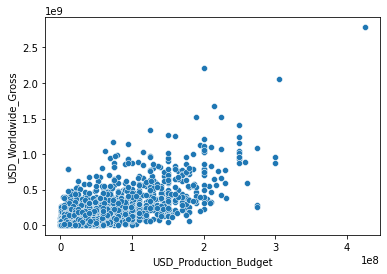

In [88]:
sns.scatterplot(data=clean,
x='USD_Production_Budget', 
y='USD_Worldwide_Gross')

In [90]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=df,
x='USD_Production_Budget', 
y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

TypeError: 'module' object is not callable

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

In [91]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(clean.Release_Date.min(), clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

TypeError: 'module' object is not callable

In [92]:
dt_index = pd.DatetimeIndex(clean.Release_Date)
years = dt_index.year

In [94]:
print(years)

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)


In [97]:
decades = years//100
clean['Decade'] = decades

In [98]:
clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,19
1,5140,1916-05-09,Intolerance,385907,0,0,19
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,19
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,19
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,19


In [102]:
old = clean[clean.Decade <= 1960]
old.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,19
1,5140,1916-05-09,Intolerance,385907,0,0,19
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,19
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,19
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,19


In [104]:
new = clean[clean.Decade >= 1960]
new.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade


<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

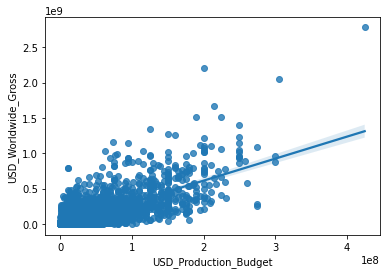

In [105]:
sns.regplot(data=old, 
x='USD_Production_Budget',
y='USD_Worldwide_Gross')

In [106]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

TypeError: 'module' object is not callable

In [110]:
from sklearn.linear_model import LinearRegression as regression

In [111]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(old, columns=['USD_Worldwide_Gross']) 

In [112]:
regression.fit(X, y)

TypeError: fit() missing 1 required positional argument: 'y'